# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Descrição dos dados

In [2]:
df = pd.read_csv('../data/raw/wines_SPA.csv')

In [3]:
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
df_dict = pd.DataFrame([
    {
        'variavel': 'winery',
        'descricao':'Vinícola: local onde o vinho foi produzido',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    },{
        'variavel':'wine',
        'descricao':'vinho',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    },{
        'variavel':'year',
        'descricao':'ano',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'rating',
        'descricao':'avaliação: de 4.2 a 4.9',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'num_reviews',
        'descricao':'número de avaliações',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'country',
        'descricao':'país de origem',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    },{
        'variavel':'region',
        'descricao':'região do vinho',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    },{
        'variavel':'price',
        'descricao':'preço em euros',
        'tipo':'quantitativa',
        'subtipo':'continua'
    },{
        'variavel':'type',
        'descricao':'tipo do vinho',
        'tipo':'qualitativa',
        'subtipo':'nominal'
    },{
        'variavel':'body',
        'descricao':'valor do "corpo" do vinho: de 2 a 5',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    },{
        'variavel':'acidity',
        'descricao':'acidez: de 1 a 3',
        'tipo':'quantitativa',
        'subtipo':'discreta'
    }
])

In [5]:
df_dict.to_csv('../data/external/dict.csv', index=False)

In [6]:
df_dict

,variavel,descricao,tipo,subtipo
0,winery,Vinícola: local onde o vinho foi produzido,qualitativa,nominal
1,wine,vinho,qualitativa,nominal
2,year,ano,quantitativa,discreta
3,rating,avaliação: de 4.2 a 4.9,quantitativa,discreta
4,num_reviews,número de avaliações,quantitativa,discreta
5,country,país de origem,qualitativa,nominal
6,region,região do vinho,qualitativa,nominal
7,price,preço em euros,quantitativa,continua
8,type,tipo do vinho,qualitativa,nominal
9,body,"valor do ""corpo"" do vinho: de 2 a 5",quantitativa,discreta


---
- São 11 variáveis, sendo 1 quantitativa contínuas, 5 quantitativas discretas e 5 qualitativas nominais.
---

## 2. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre preço e tipo?
- Existe alguma relação entre preço e vinho?
- Existe alguma relação entre preço e região?
- Existe alguma relação entre preço e vinícola?
- Existe alguma relação entre região e tipo?
- Existe alguma relação entre região e vinícola?
- Existe alguma relação entre região e vinho
- Existe alguma relação entre vinho e tipo?
- Existe alguma relação entre vinho e vinícola?
- Existe alguma relação entre vinícola e tipo?
- Existe alguma relação entre as avaliações (acidity, body, rating) com as outras variáveis?

### Existem dados faltantes, se sim quantos e em quais variáveis?

Como as variáveis 'num_reviews, rating, body, acidity e year' são discretas, podemos transformá-las em string para melhor avaliação

In [7]:
df['year'] = df['year'].replace('N.V.', np.nan)
df[['rating', 'body', 'acidity', 'num_reviews']] = df[['rating', 'body', 'acidity', 'num_reviews']].fillna('').astype(str)
df[['rating', 'body', 'acidity', 'num_reviews']] = df[['rating', 'body', 'acidity', 'num_reviews']].replace('', np.nan)

In [8]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

In [9]:
print(df.isnull().sum())
number_of_na_rows = df.isnull().any(axis=1).sum()
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]

print(f'''
A partir dessa informação percebemos que existem valores faltantes na(s) variável(is) {number_of_na_by_column.axes[0].tolist()}.
Além disso, sabemos que existem {number_of_na_rows} linhas com valores faltantes''')

winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

A partir dessa informação percebemos que existem valores faltantes na(s) variável(is) ['year', 'type', 'body', 'acidity'].
Além disso, sabemos que existem 1430 linhas com valores faltantes


In [10]:
df.describe(include='all')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,7500,7500,7210,7500,7500,7500,7500,7500.000000,6955,6331,6331
unique,480,847,70,8,817,1,76,NaN,21,4,3
top,Contino,Reserva,2011,4.2,420,Espana,Rioja,NaN,Rioja Red,4.0,3.0
freq,457,467,1190,5679,881,7500,2440,NaN,2357,4120,6028
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.095822,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.356676,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.900000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.530000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.350000,NaN,NaN,NaN


- Dos 7500 totais, são únicos 847 vinhos, 480 vinícolas, 76 regiões e 21 tipos.
- O vinho mais comum é o Reserva com 467 aparições.
- A vinícola mais comum é a Contino com 457 aparições.
- O ano mais comum é 2011 com 1190 aparições.
- A região mais comum é Rioja com 2440 aparições.
- O tipo mais comum é Rioja Red com 2357 aparições.
- A média de preço é, aproximadamente, 60.10 euros.

Como só existe um país, Espanha, ele não influencia para continuação das observações.
Logo, podemos tirá-lo do DataFrame

In [11]:
del df['country']
df_dict = df_dict.query('variavel!="country"')
df_dict.reset_index(drop=True, inplace=True)

In [12]:
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [13]:
df_dict

,variavel,descricao,tipo,subtipo
0,winery,Vinícola: local onde o vinho foi produzido,qualitativa,nominal
1,wine,vinho,qualitativa,nominal
2,year,ano,quantitativa,discreta
3,rating,avaliação: de 4.2 a 4.9,quantitativa,discreta
4,num_reviews,número de avaliações,quantitativa,discreta
5,region,região do vinho,qualitativa,nominal
6,price,preço em euros,quantitativa,continua
7,type,tipo do vinho,qualitativa,nominal
8,body,"valor do ""corpo"" do vinho: de 2 a 5",quantitativa,discreta
9,acidity,acidez: de 1 a 3,quantitativa,discreta


### Qual a distribuição dos dados (variável por variável)?


##### Distribuição das variáveis qualitativas

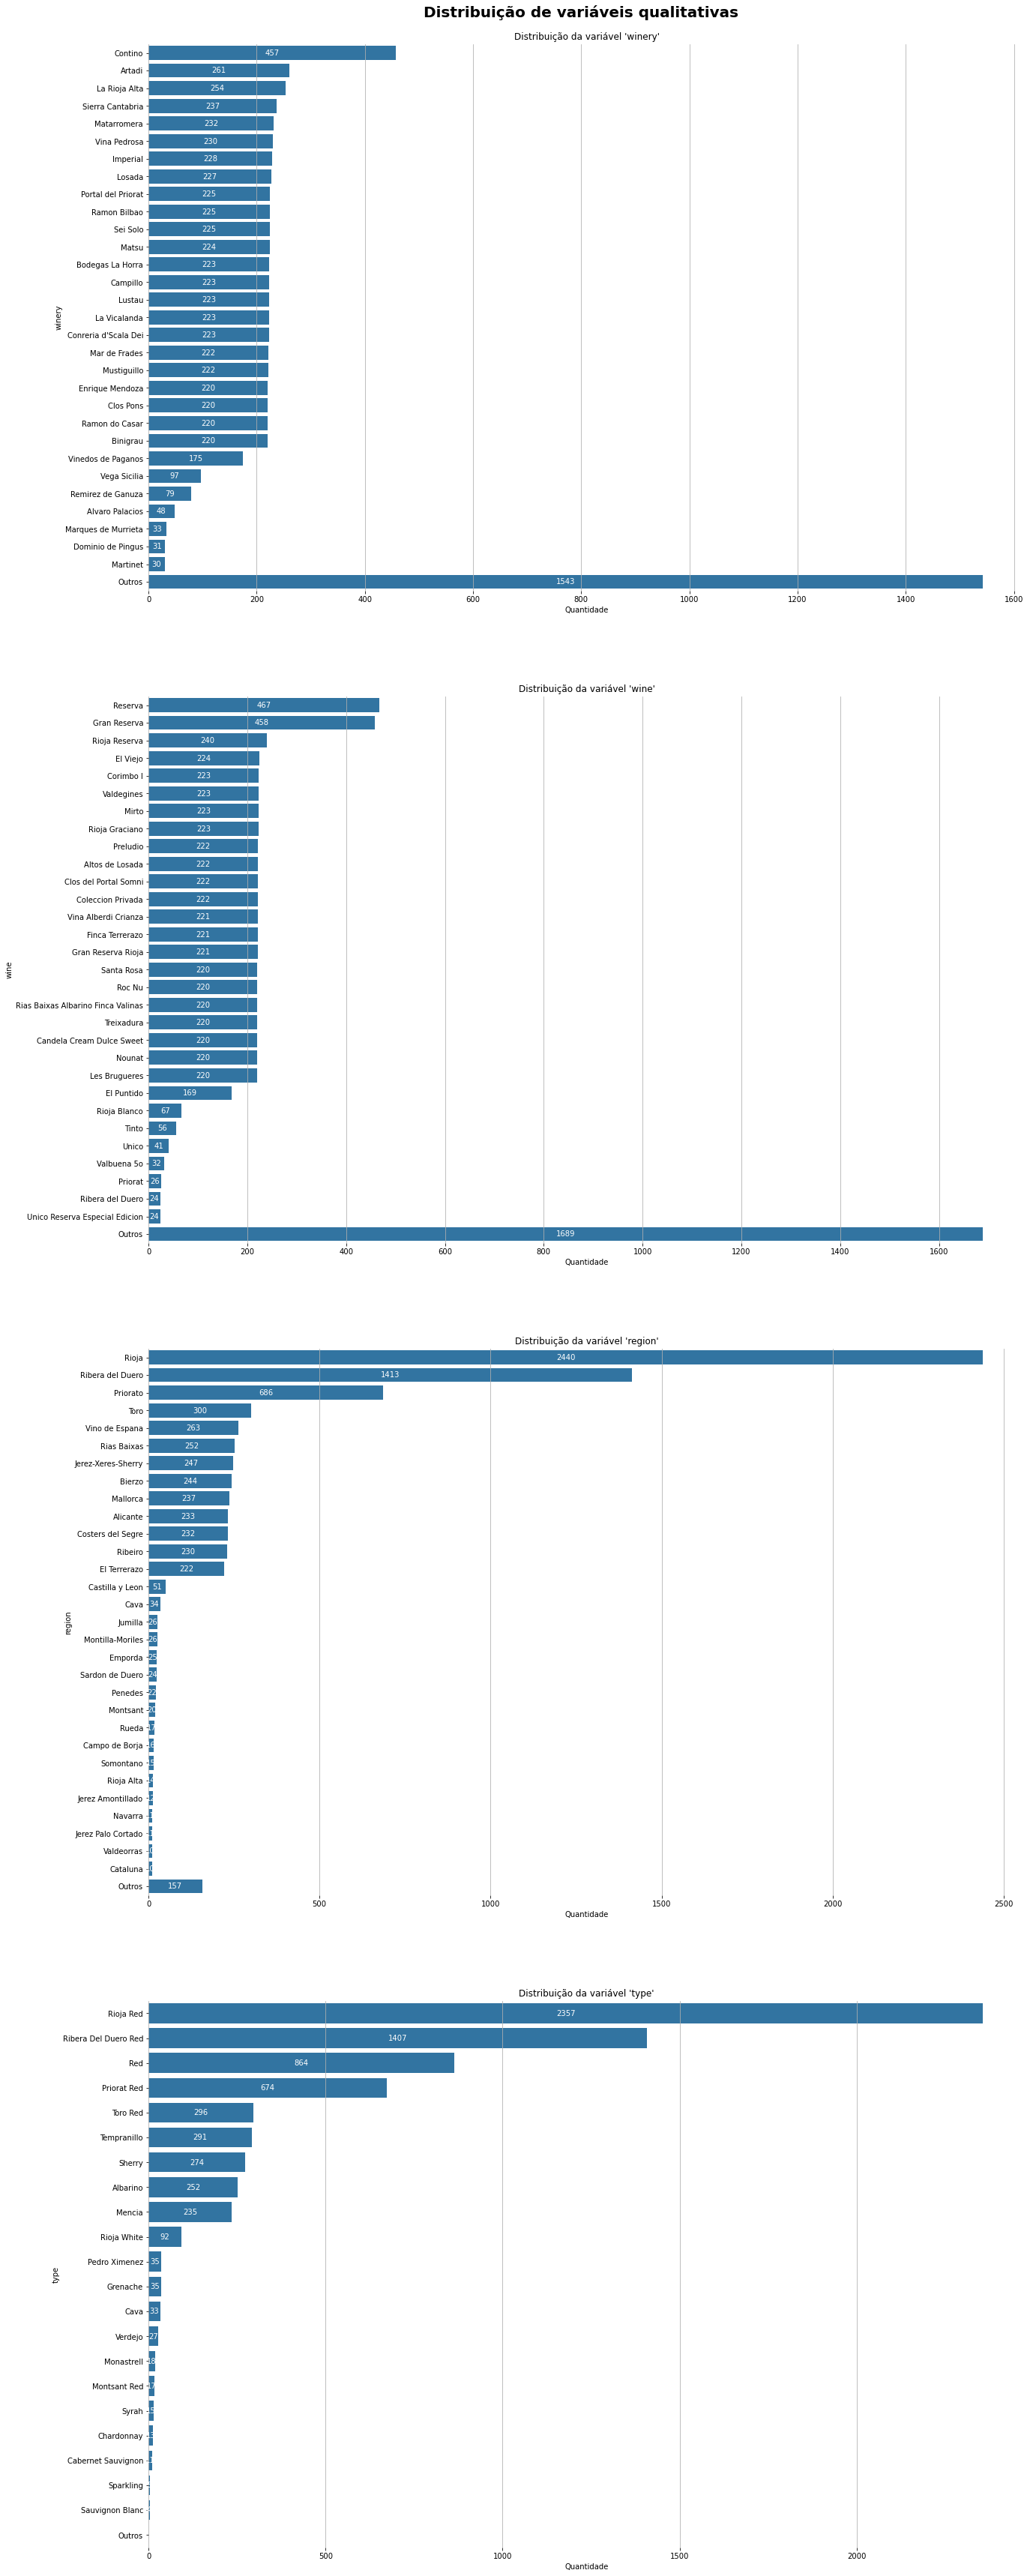

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(20,50))
plt.tight_layout(pad=12)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold', fontsize=20)
for i, variavel in enumerate(df_dict.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    df_copy=df.copy()
    df_copy[variavel]=df_copy[variavel].replace(order[30:], 'Outros')
    ax = sns.countplot(
        data=df_copy,
        y=variavel,
        ax=axes.flatten()[i],
        order=(list(order[:30])) + ['Outros']
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')
plt.show()

---
De acordo com os gráficos plotados, pode-se observar que:
- Nas vinícolas da pesquisa, existe uma que está a frente, Contino, e, depois, outras aparecem bem próximas entre 220 e 260 aparições.
- Nos vinhos, se observa algo parecido, dois aparecem bem mais, Reserva e Gran Reserva, e, depois, vários outros aparecem bem próximos, entre 220 e 240 aparições.
- Na região, Rioja aparece bem a frente de todas, seguida de Ribera del Duero.
- Já nos tipos de vinhos, Rioja Red e Ribera del Duero Red, respectivamente, aparecem a frente.
---

##### Distribuição das variáveis quantitativas discretas

In [15]:
df[['year', 'num_reviews']] = df[['year', 'num_reviews']].fillna(-1)
df[['year', 'num_reviews']] = df[['year', 'num_reviews']].astype(int)

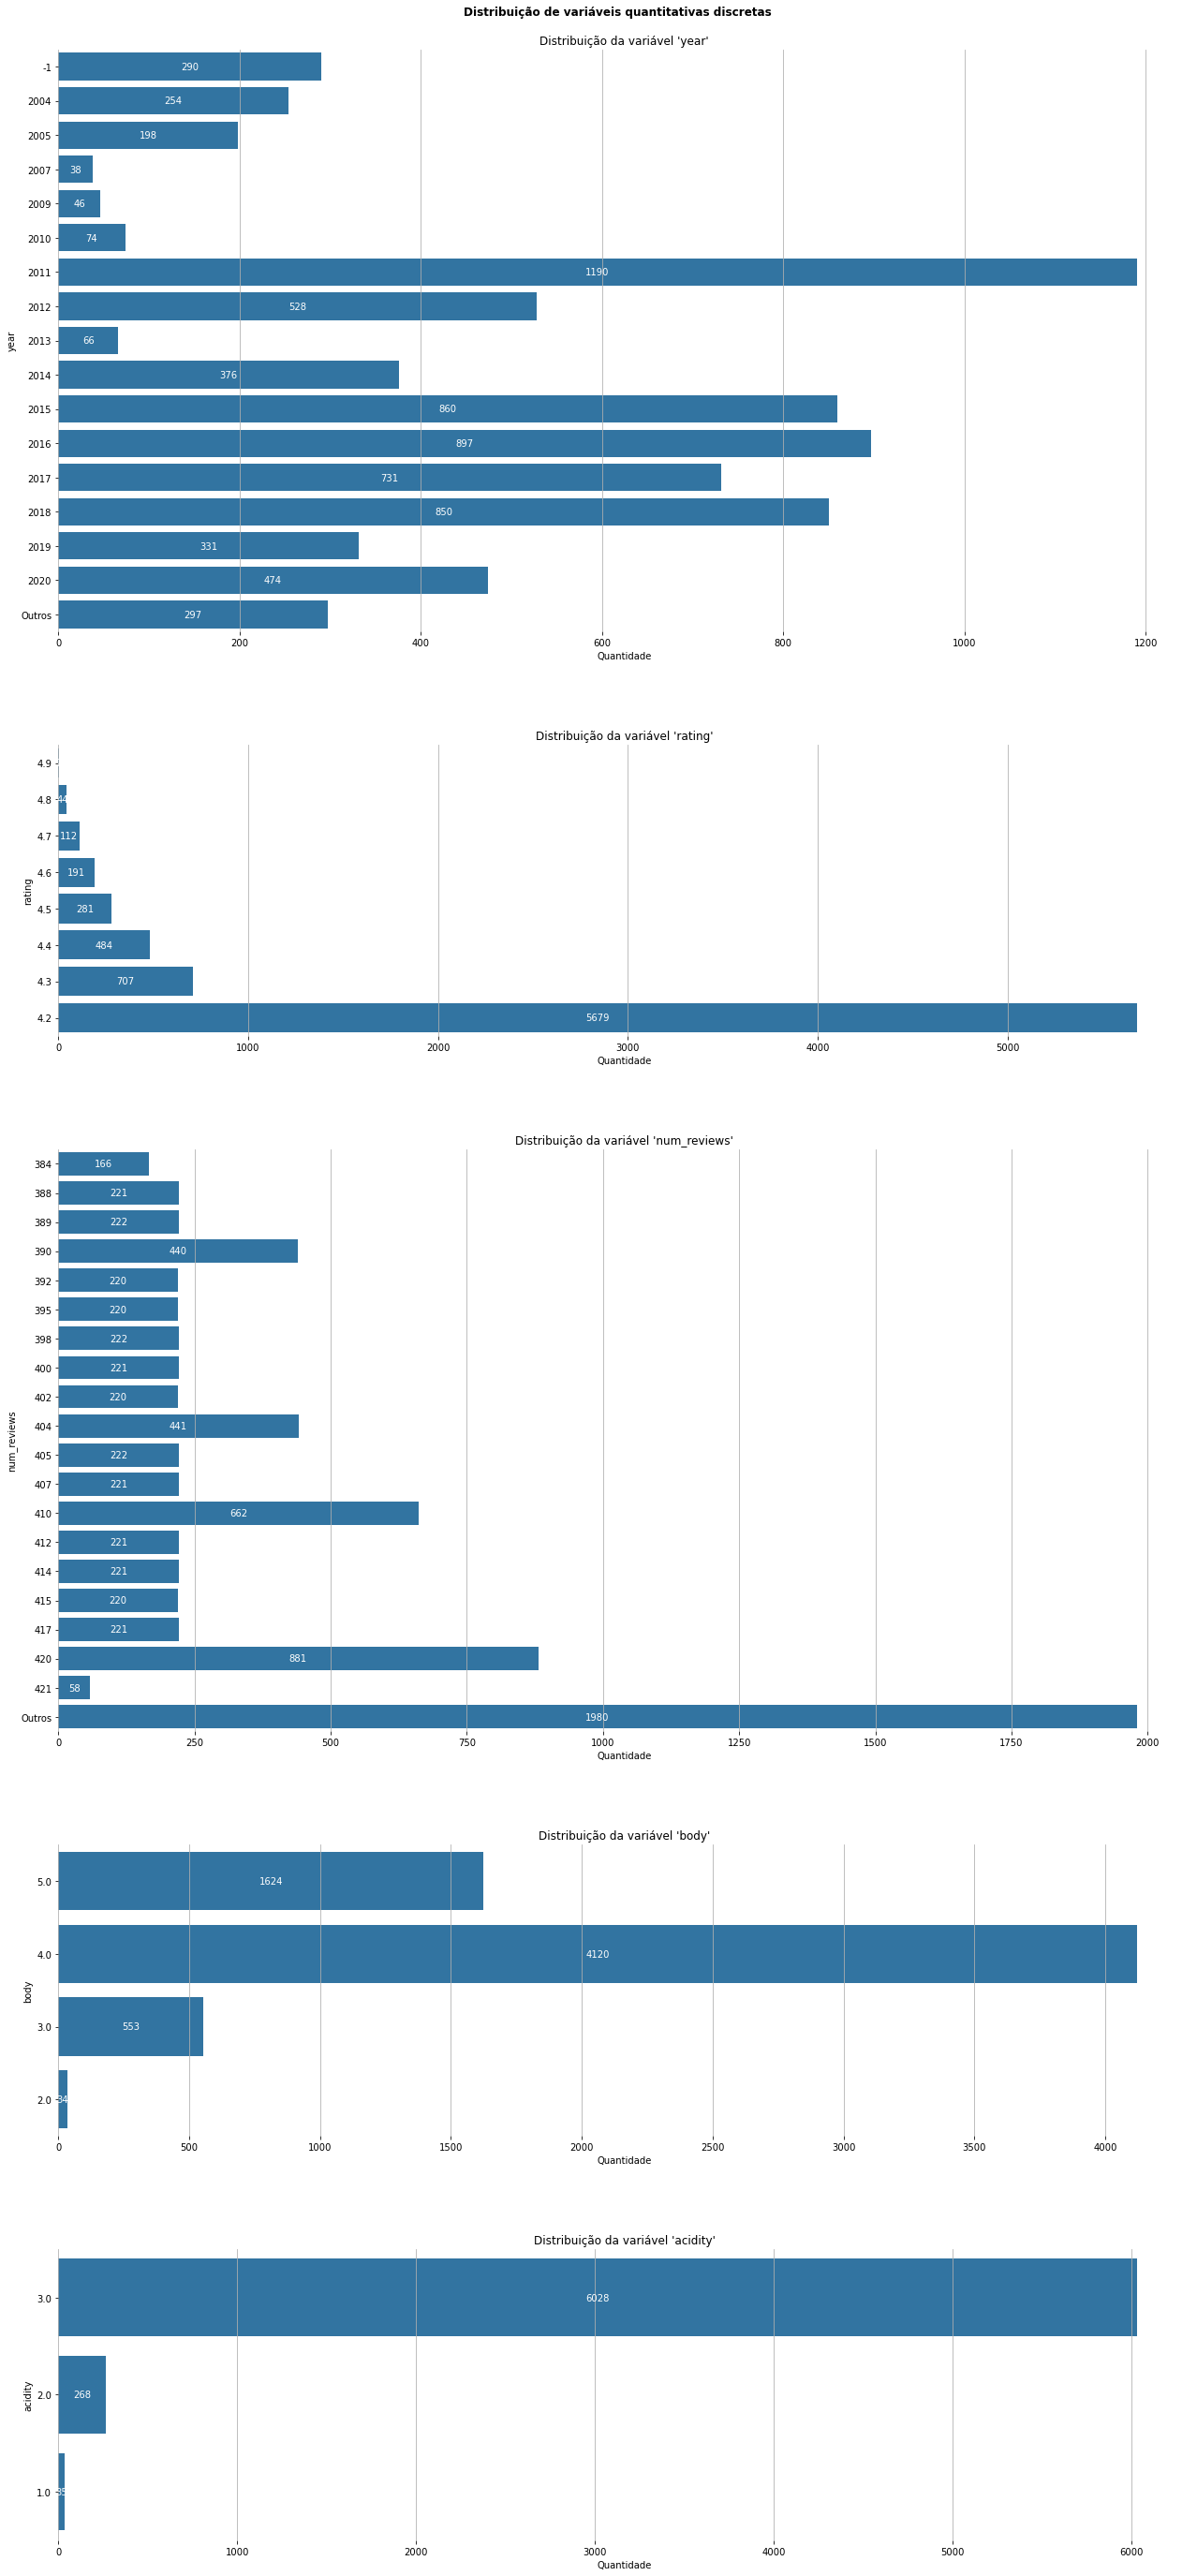

In [16]:
fig, axes = plt.subplots(5, 1, figsize=(20,40),gridspec_kw={'height_ratios':[2, 1, 2, 1, 1]})
plt.tight_layout(pad=10)
fig.suptitle('Distribuição de variáveis quantitativas discretas', fontweight='bold')

for i, variavel in enumerate(df_dict.query("subtipo == 'discreta'").variavel.to_list()):
    if variavel == 'year' or variavel == 'num_reviews':
        total = df[variavel].count()
        value_counts = df[variavel].value_counts()
        value_counts_filtered = value_counts[(value_counts / total) > 0.005]
        df_ncopy = df.query(f"{variavel} in @value_counts_filtered.index")
        order = df_ncopy[variavel].value_counts().index.tolist()
        order.sort()
        order.append('Outros')
        df_copy = df.copy()
        df_copy[variavel] = df_copy[variavel].astype(str)
        df_copy.loc[~df_copy[variavel].isin(value_counts_filtered.index.astype(str)), variavel] = 'Outros'
        
        ax = sns.countplot(
            data=df_copy,
            y=variavel,
            ax=axes.flatten()[i],
            order = order
        )
    else:
        ax = sns.countplot(
            data=df,
            y=variavel,
            ax=axes.flatten()[i]
        )
    
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    
    ax.set(frame_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.ylabel(variavel)
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')

plt.show()


----
- O ano dos vinhos é bem variado, com 2011 aparecendo a frente dos outros.
- O "rating" mais dado aos vinhos foi 4.2, com larga vantagem para as outras notas.
- Os números de reviews, em sua maioria, estão entre 380 e 420.
- A nota para o corpo mais dada foi 4, seguida de 5.
- A nota para acidez mais presente, disparadamente, é 3.
----

##### Distribuição das variáveis quantitativas continuas

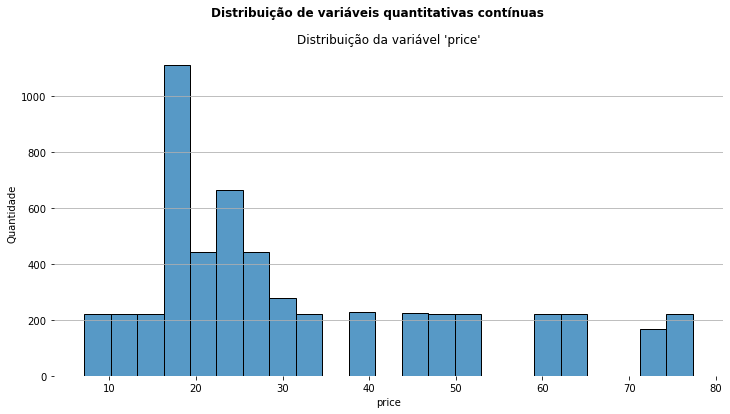

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle('Distribuição de variáveis quantitativas contínuas', fontweight='bold')
total = df['price'].count()
value_counts = df['price'].value_counts()
value_counts_filtered = value_counts[(value_counts/total) > 0.005]
outros_count = total - value_counts_filtered.sum()
df_copy = df.query(f"{'price'} in @value_counts_filtered.index")
sns.histplot(
    data=df_copy,
    x='price',
    ax=ax,
)
ax.set(frame_on=False)
ax.set_title(f"Distribuição da variável '{'price'}'")
plt.xlabel('price')
ax.set_ylabel('Quantidade')
ax.grid(axis='y', linestyle='-')
plt.show()

-------------
- Os preços que mais aparecem são entre 15 e 20 euros.
---------

### Existe alguma relação entre vinho e preço?

Generalizando para os 5 vinhos que mais aparecem.

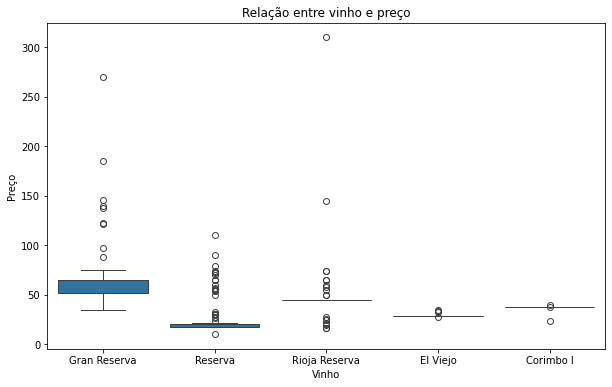

In [18]:
plt.figure(figsize=(10, 6))
wines = df['wine'].value_counts().head(5).index
df_copy = df.query(f"wine in @wines")
sns.boxplot(x='wine', y='price', data=df_copy)
plt.title('Relação entre vinho e preço')
plt.xlabel('Vinho')
plt.ylabel('Preço')
plt.show()

### Existe alguma relação entre tipo e preço?

Generalizando para os 5 tipos que mais aparecem.

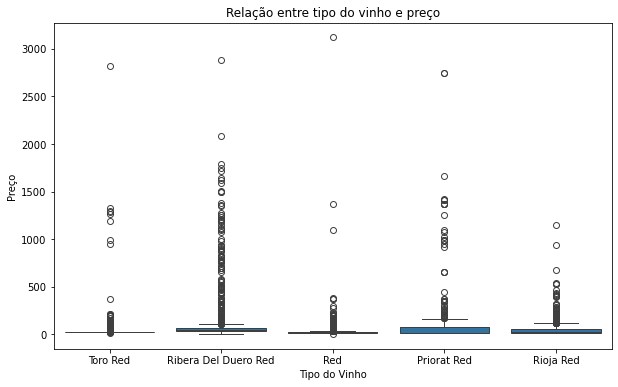

In [19]:
plt.figure(figsize=(10, 6))
types = df['type'].value_counts().head(5).index
df_copy = df.query(f"type in @types")
sns.boxplot(x='type', y='price', data=df_copy)
plt.title('Relação entre tipo do vinho e preço')
plt.xlabel('Tipo do Vinho')
plt.ylabel('Preço')
plt.show()

### Existe alguma relação entre região e preço?

Generalizando para as 5 regiões que mais aparecem.

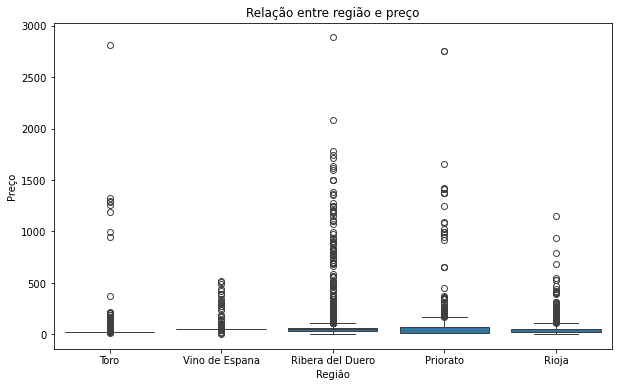

In [20]:
plt.figure(figsize=(10, 6))
regions = df['region'].value_counts().head(5).index
df_copy = df.query(f"region in @regions")
sns.boxplot(x='region', y='price', data=df_copy)
plt.title('Relação entre região e preço')
plt.xlabel('Região')
plt.ylabel('Preço')
plt.show()

### Existe alguma relação entre vinícola e preço?

Generalizando para as 5 vinícolas que mais aparecem.

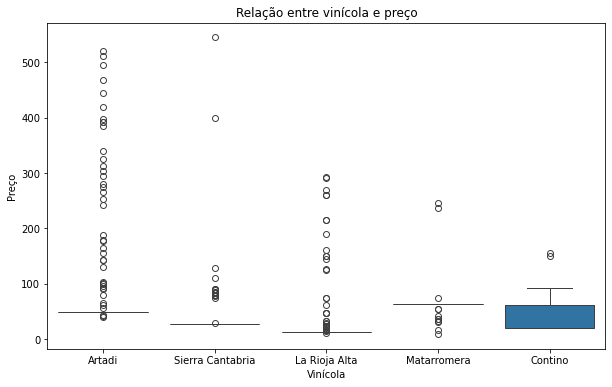

In [21]:
plt.figure(figsize=(10, 6))
wineries = df['winery'].value_counts().head(5).index
df_copy = df.query(f"winery in @wineries")
sns.boxplot(x='winery', y='price', data=df_copy)
plt.title('Relação entre vinícola e preço')
plt.xlabel('Vinícola')
plt.ylabel('Preço')
plt.show()

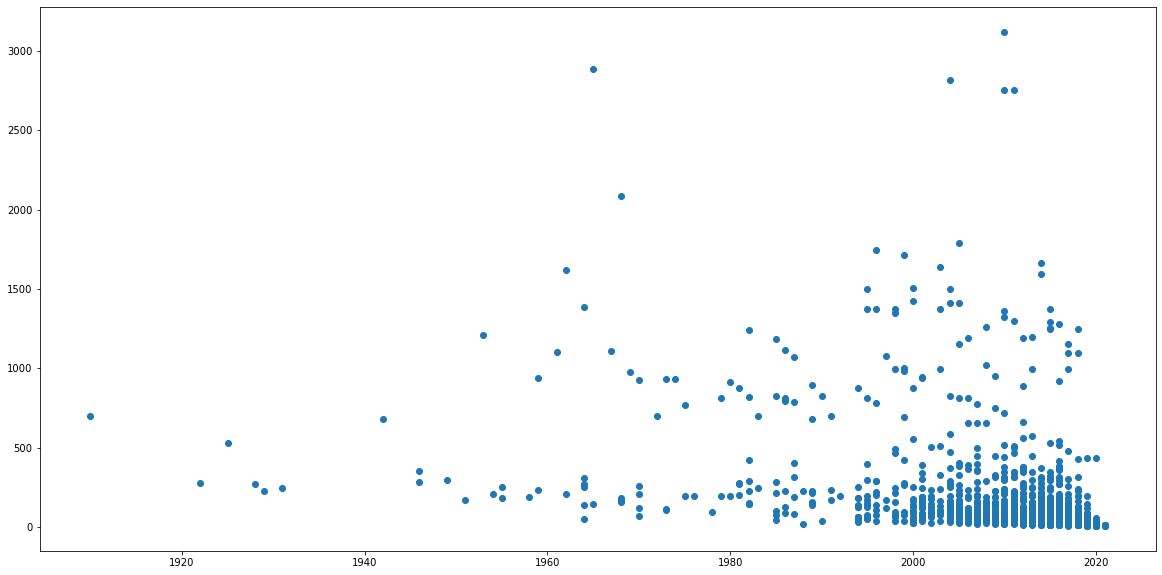

In [22]:
plt.figure(figsize=(20, 10))
df_copy=df.query('year!= -1')
plt.scatter(df_copy['year'].to_list(), df_copy['price'].to_list())
plt.show()

-------------
- Não é possível relacionar nada com o preço, visto que os valores estão bem distríbuidos, com muitos 'outliers', o que indetermina qualquer relação a preço.
---------

### Existe alguma relação entre região e tipo?

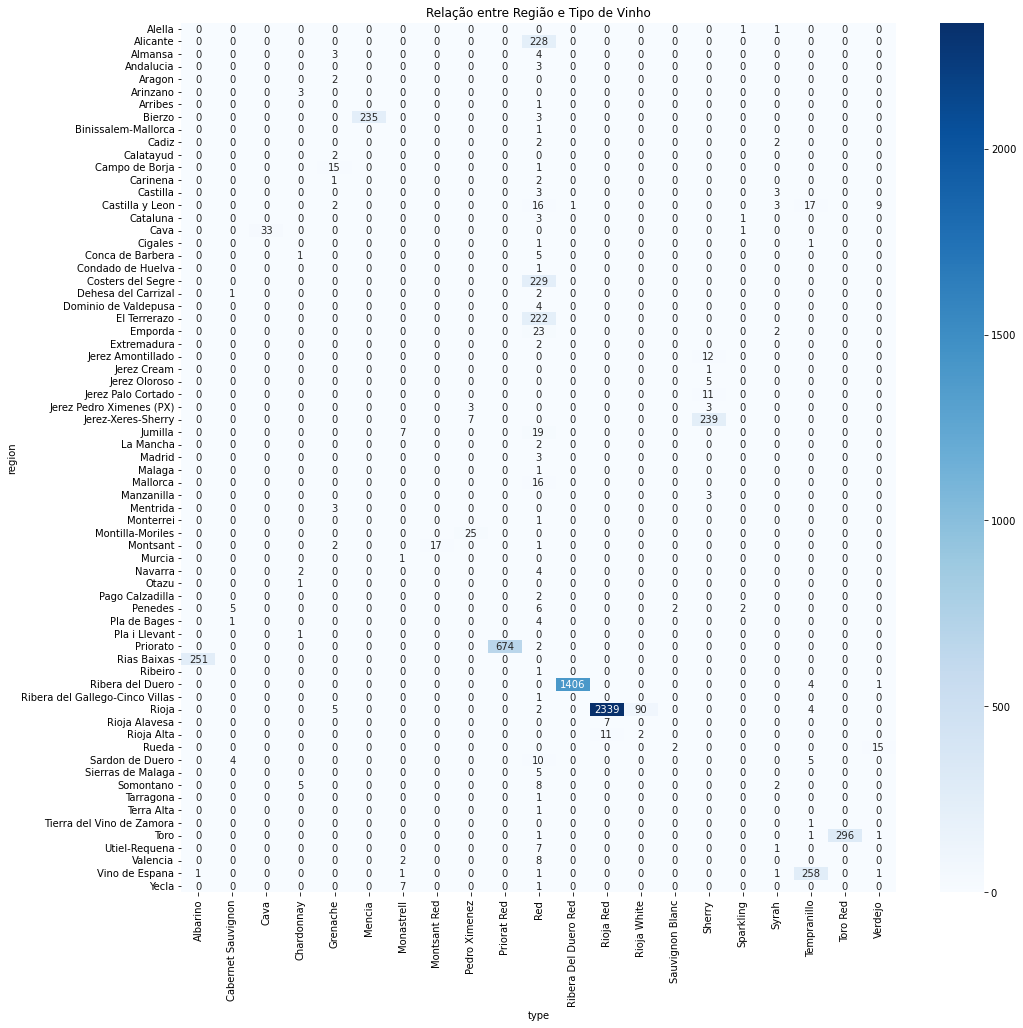

In [23]:
table = pd.crosstab(df['region'], df['type'])

plt.figure(figsize=(16, 16))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre Região e Tipo de Vinho')
plt.show()

-------------
- Percebe-se que existe uma relação bem clara entre tipo e região.
- Exceto o tipo 'Red', que está distribuído, principalmente, em 3 regiões (Alicante, Costers del Segre, El Terrerazo), todos os outros tipos são em sua maioria absoluta, ou por completo, produzidos em apenas uma região. Por exemplo, Albarino nas Rias Baixas, Mencia em Bierzo, Priorat Red em Priorato, etc.
---------

### Existe alguma relação entre região e vinícola?

Generalizando para as 40 vinícolas mais comuns.

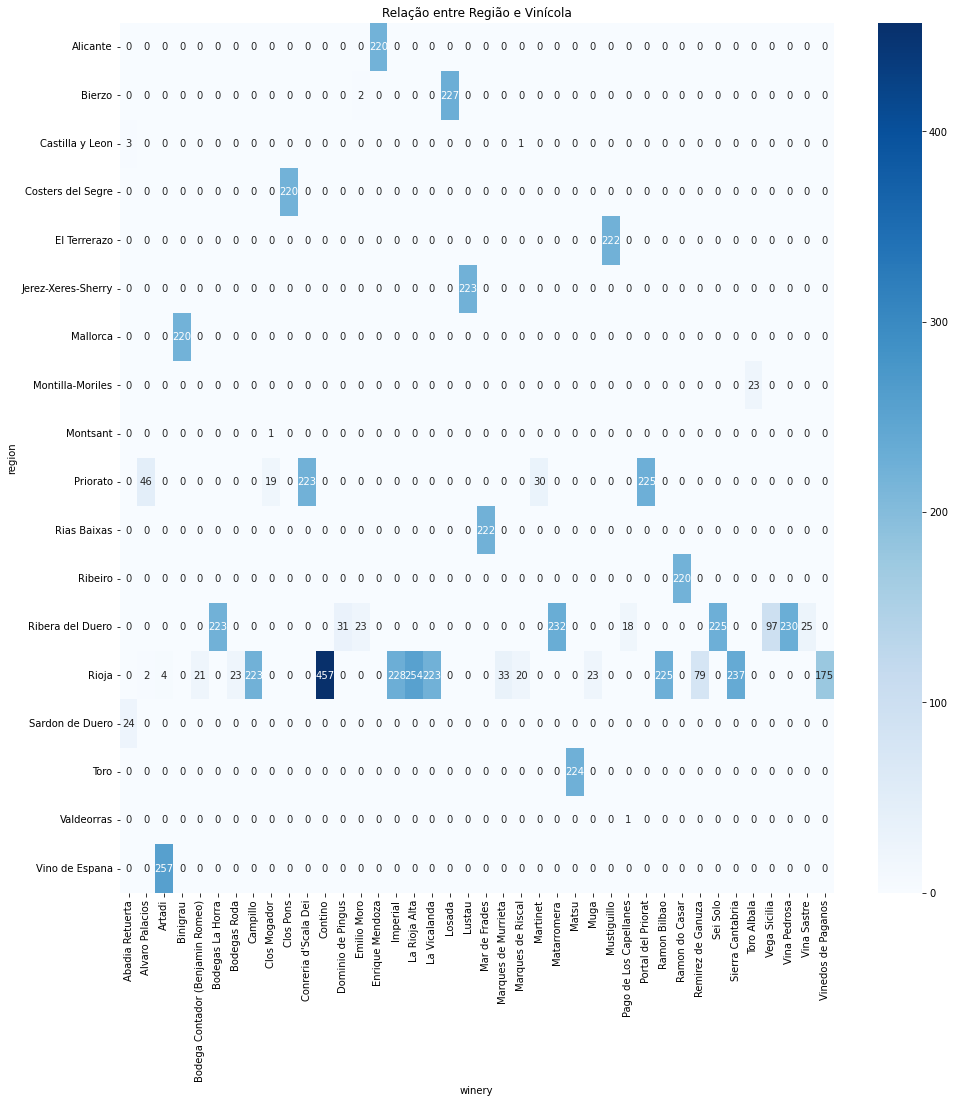

In [24]:
wineries = df['winery'].value_counts().head(40).index
df_copy = df.query(f"winery in @wineries")
table = pd.crosstab(df_copy['region'], df_copy['winery'])

plt.figure(figsize=(16, 16))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre Região e Vinícola')
plt.show()

-------------
- A maioria das regiões possuem apenas uma vinícola, por exemplo Alicante, Bierzo, Toro, etc.
- As regiões Priorato, Ribera del Duero e Rioja possuem muitas vinícolas.
---------

### Existe alguma relação entre região e vinho?

Generalizando para os 40 vinhos mais comuns.

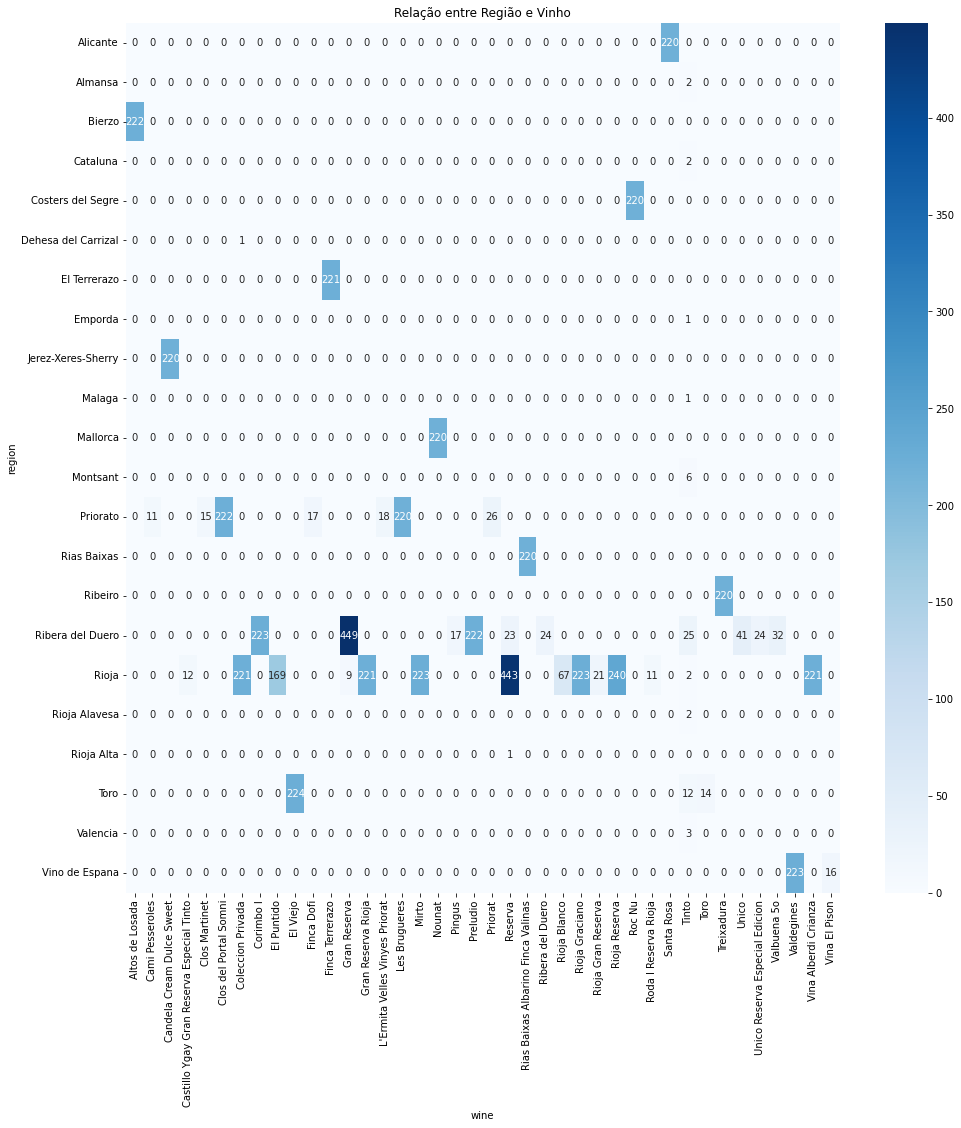

In [25]:
wines = df['wine'].value_counts().head(40).index
df_copy = df.query(f"wine in @wines")
table = pd.crosstab(df_copy['region'], df_copy['wine'])

plt.figure(figsize=(16, 16))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre Região e Vinho')
plt.show()

-------------
- Assemelha-se bastante com a relação entre região e vinícola
---------

### Existe alguma relação entre vinho e vinícola?

Generalizando para as 40 vinícolas mais comuns.

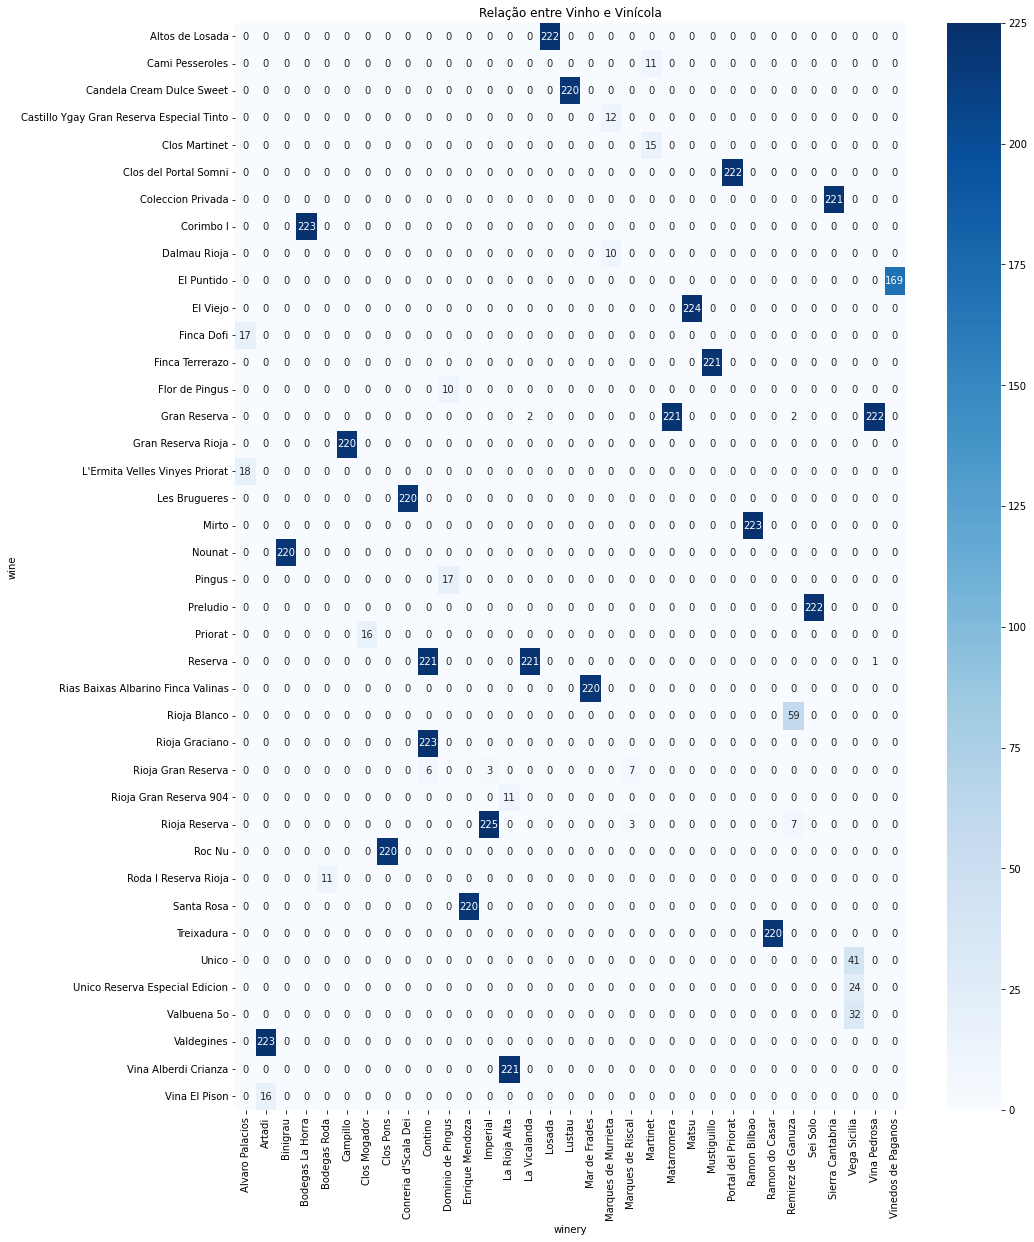

In [26]:
wineries = df['winery'].value_counts().head(40).index
df_copy = df.query(f"winery in @wineries")
wines = df_copy['wine'].value_counts().head(40).index
df_copy = df_copy.query("wine in @wines")
table = pd.crosstab(df_copy['wine'], df_copy['winery'])


plt.figure(figsize=(15, 20))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre Vinho e Vinícola')
plt.show()

-------------
- Percebe-se que cada vinícola produz 1 ou 2 vinhos majoritariamente.
- Daí vem a semelhança na relação região-vinho e região-vinícola.
---------

### Existe alguma relação entre tipo e vinho?

Generalizando para os 40 vinhos mais comuns.

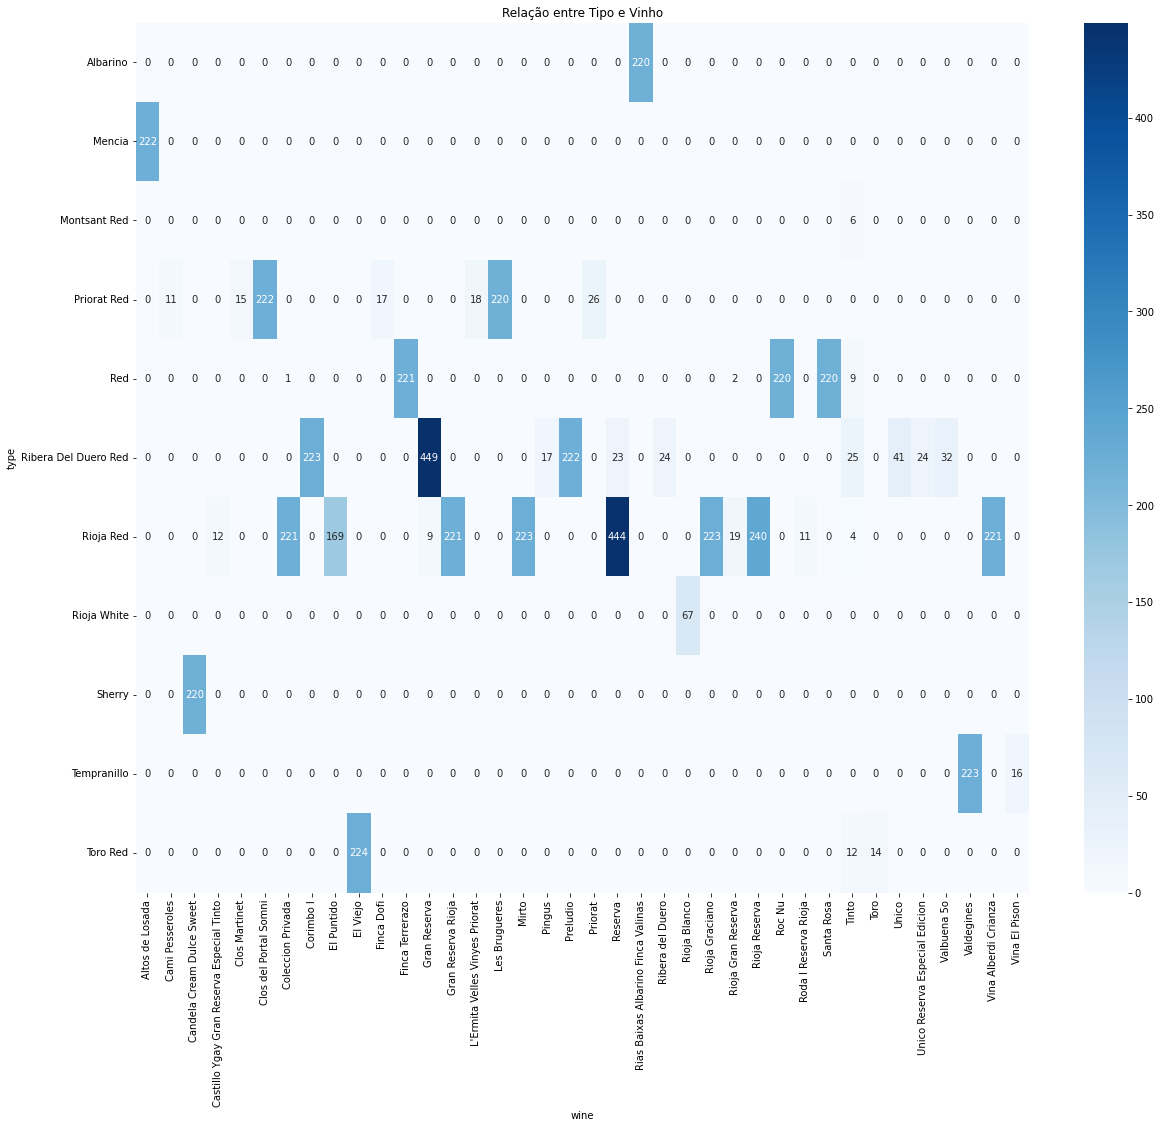

In [27]:
wines = df['wine'].value_counts().head(40).index
df_copy = df.query(f"wine in @wines")

table = pd.crosstab(df_copy['type'], df_copy['wine'])
plt.figure(figsize=(20, 16))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre Tipo e Vinho')
plt.tick_params(axis='y', rotation=0)
plt.show()

-------------
- Os tipo Albarino, Mencia, Rioja White, Sherry, Tempranillo e Toro Red possuem apenas um vinho.
- Já os tipos Priorat Red, Red, Ribera del Duero Red e Rioja Red possuem uma variação de vinhos.
---------

### Existe alguma relação entre tipo e vinícola?

-------------
- Como já analisado, pode-se inferir que será igual a relação supramencionada.
---------

Generalizando para as 40 vinícolas mais comuns.

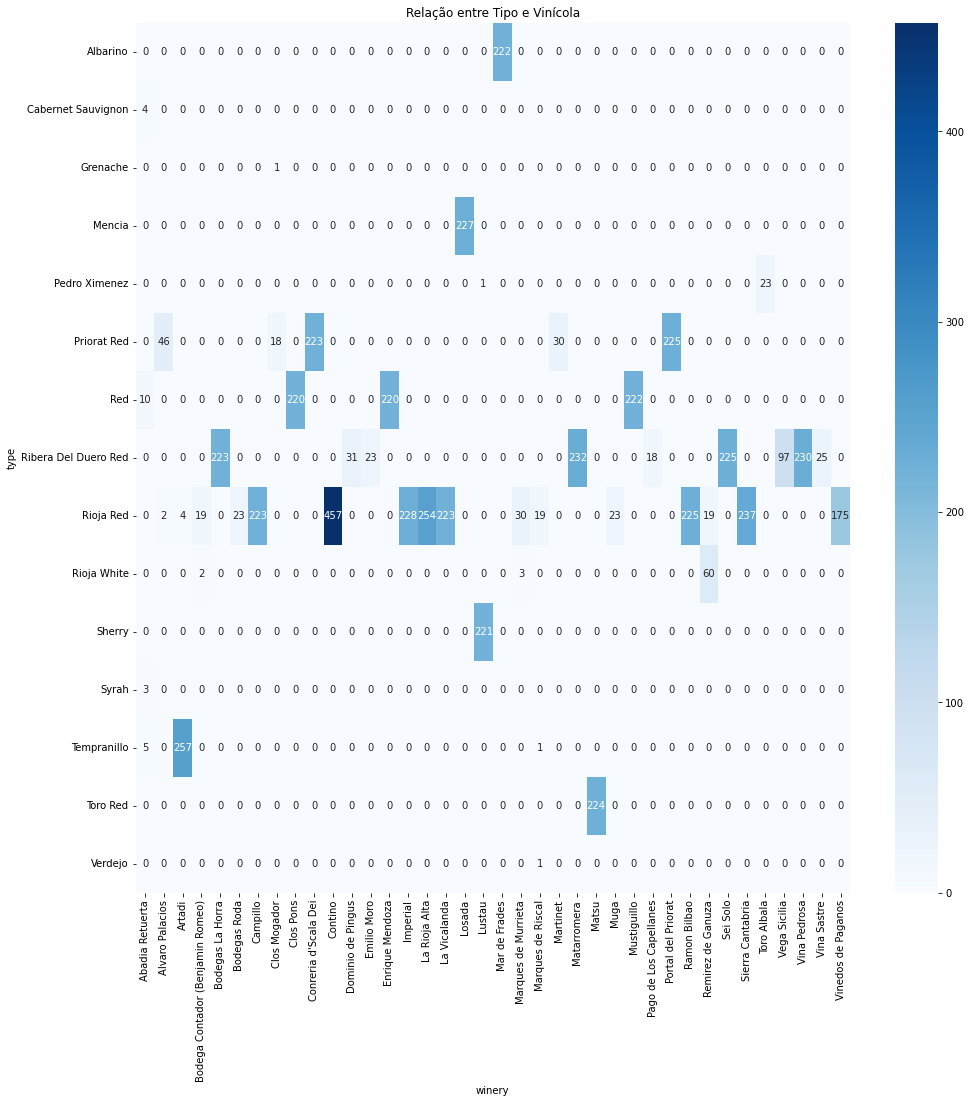

In [28]:
wineries = df['winery'].value_counts().head(40).index
df_copy = df.query(f"winery in @wineries")
table = pd.crosstab(df_copy['type'], df_copy['winery'])

plt.figure(figsize=(16, 16))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d')
plt.title('Relação entre Tipo e Vinícola')
plt.show()

### Existe alguma relação entre acidez e as outras variáveis?

Generalizando para as 40 variáveis que mais aparecem

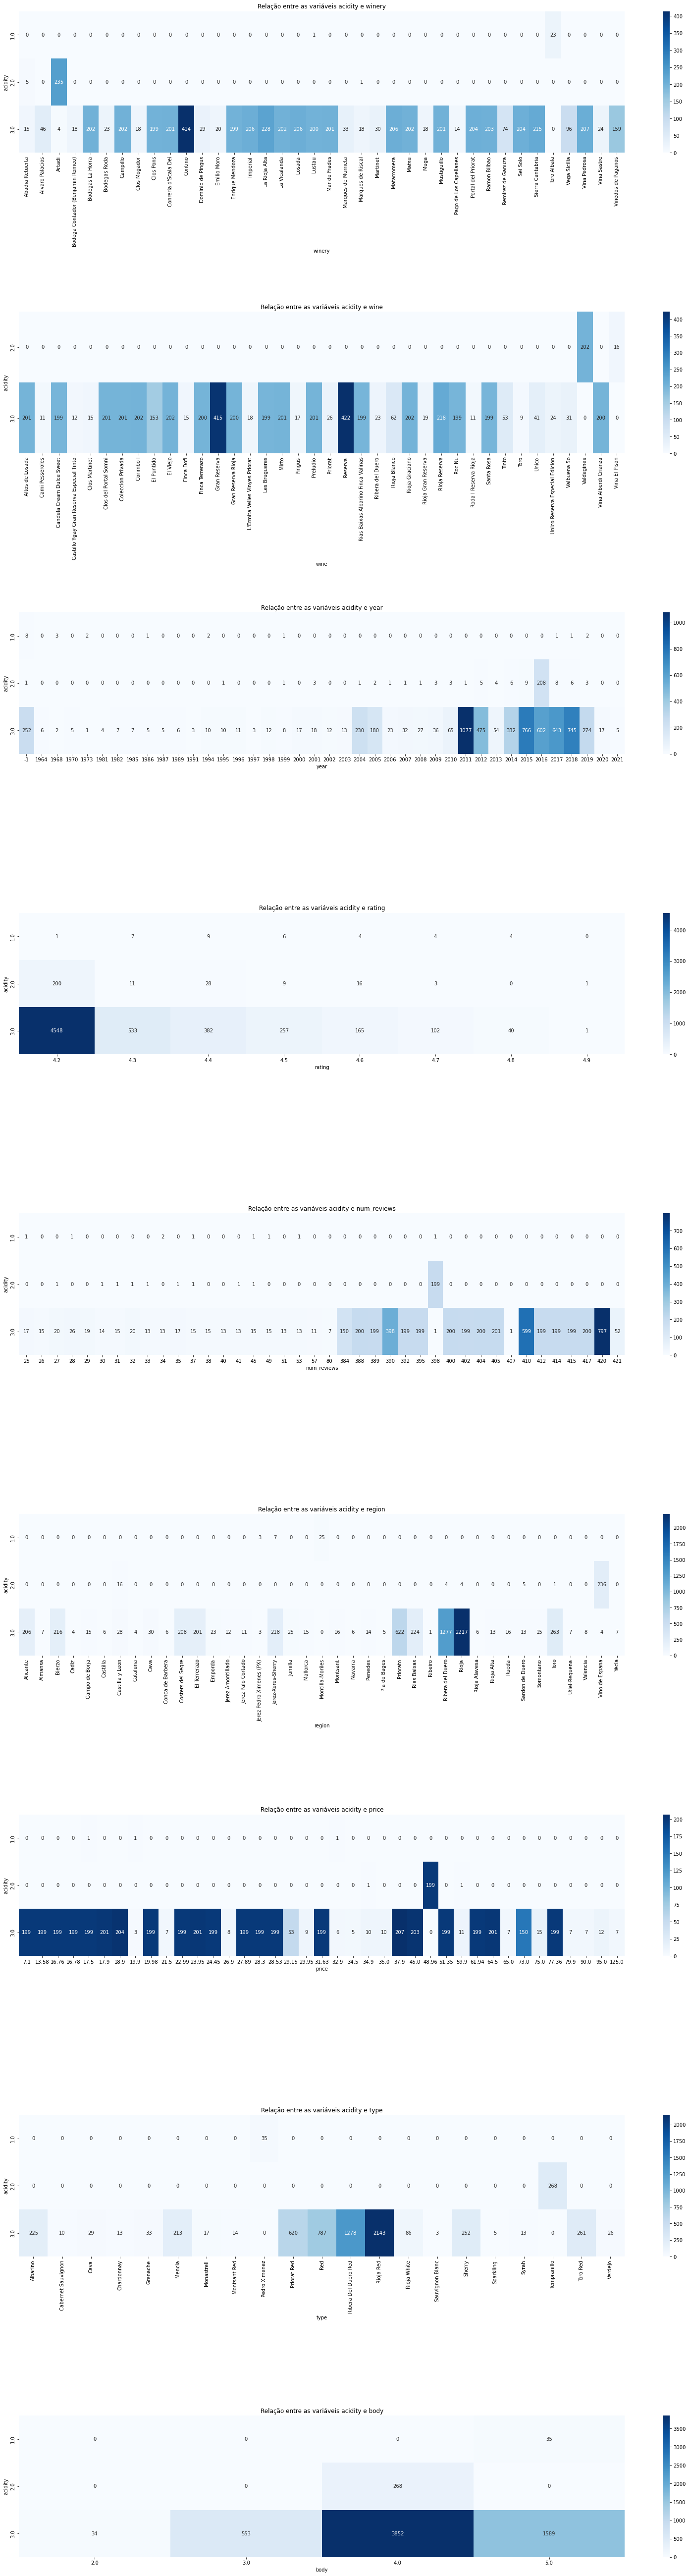

In [29]:
fig, axes = plt.subplots(9, 1, figsize = (30, 80))
plt.tight_layout(pad=30)
for i, variavel in enumerate(df_dict.query('variavel != "acidity"').variavel.to_list()):
    lista = df[variavel].value_counts().head(40).index
    df_copy = df[df[variavel].isin(lista)]
    table = pd.crosstab(df_copy['acidity'], df_copy[variavel])
    ax = sns.heatmap(data = table, 
                     annot=True, 
                     cmap='Blues', 
                     fmt='d',
                     ax=axes.flatten()[i]
                    )
    ax.set(frame_on=False)
    ax.set_title(f"Relação entre as variáveis acidity e {variavel}")

plt.show()

-------------
- Como visto mais acima, a grande maioria das avaliações de acidez são nota 3, logo não tem como estabelecer uma relação dessa nota com as outras variáveis.
- Já para a nota 2, percebe-se que ela para cada variável apresenta apenas uma amostra:
  1. Vinícola: Artadi.
  2. Vinho: Valdegines.
  3. Ano: 2016.
  4. Número de reviews: 398.
  5. Região: Vino de Espana.
  6. Preço: Aproximadamente, 49€.
  7. Tipo: Tempranillo.
  8. Body: 4.
- A nota 1 tem pouquísismas aparições, logo não tem como estabelecer alguma relação.
  
---------

### Existe alguma relação entre body e as outras variáveis?

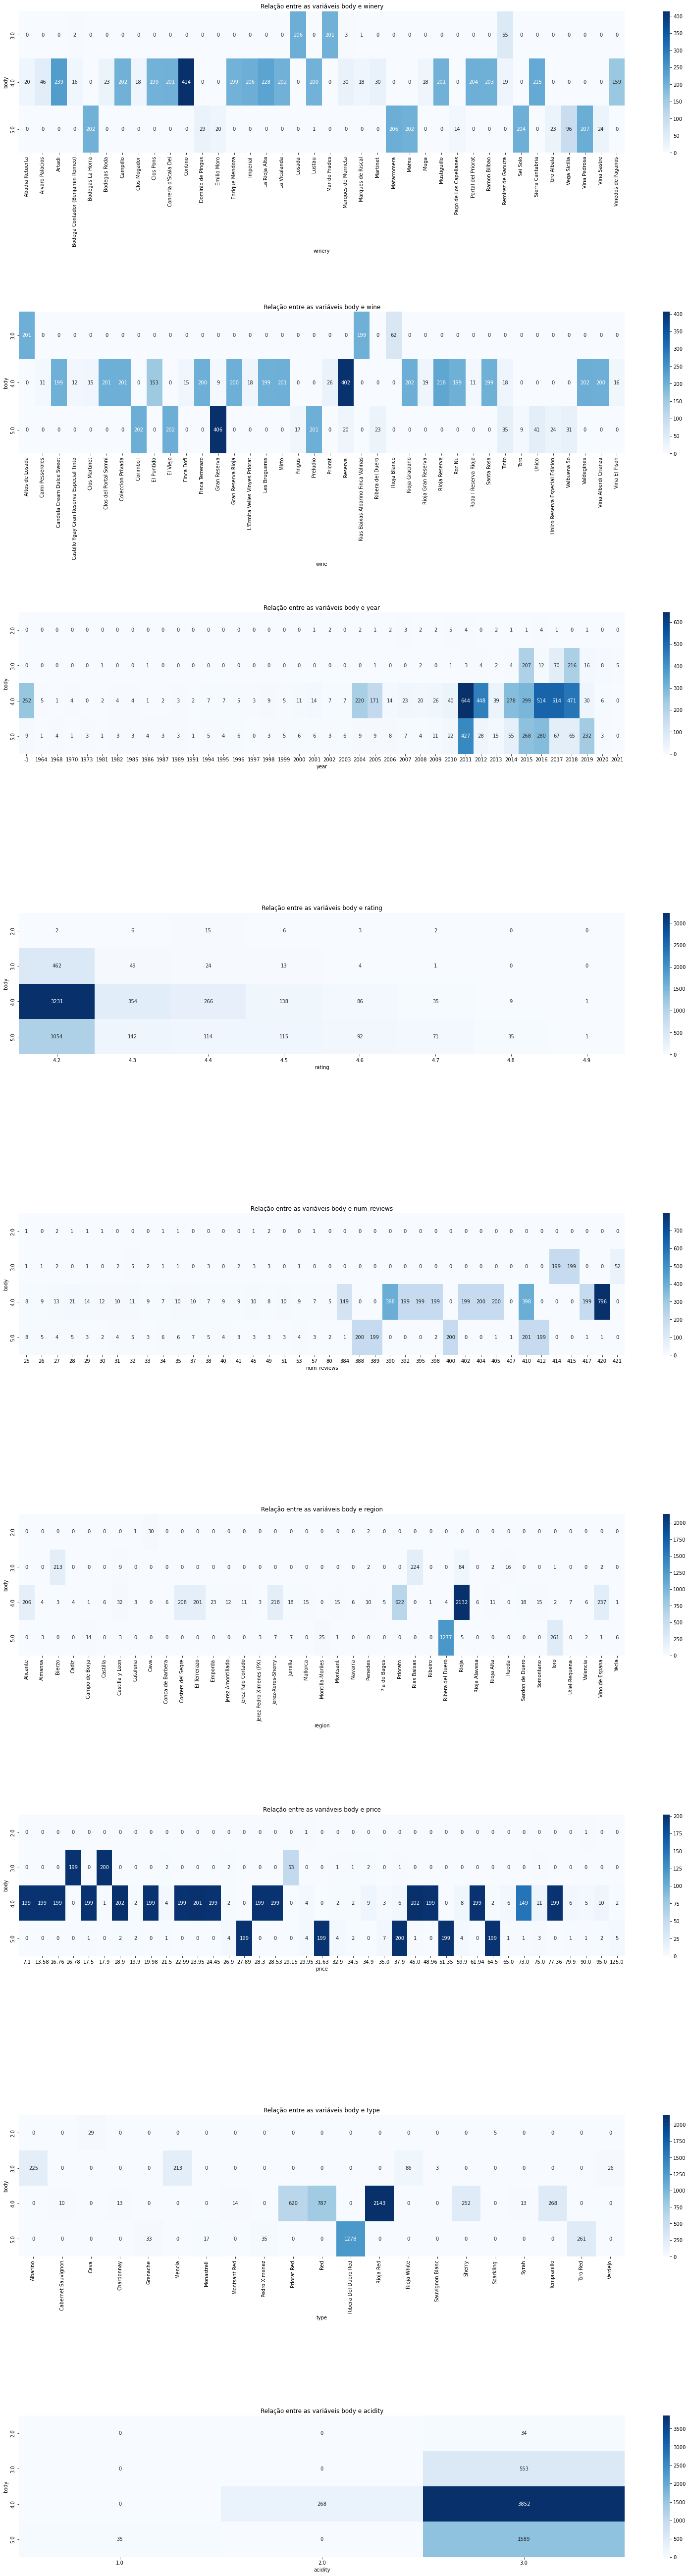

In [30]:
fig, axes = plt.subplots(9, 1, figsize = (30, 80))
plt.tight_layout(pad=30)
for i, variavel in enumerate(df_dict.query('variavel != "body"').variavel.to_list()):
    lista = df[variavel].value_counts().head(40).index
    df_copy = df[df[variavel].isin(lista)]
    table = pd.crosstab(df_copy['body'], df_copy[variavel])
    ax = sns.heatmap(data = table, 
                     annot=True, 
                     cmap='Blues', 
                     fmt='d',
                     ax=axes.flatten()[i]
                    )
    ax.set(frame_on=False)
    ax.set_title(f"Relação entre as variáveis body e {variavel}")

plt.show()

-----
- Existe um padrão bem claro entre body e vinho. Cada vinho apresenta um 'body' bem claro, sem muita dispersões nesse tipo de avaliação.
- Para vinícola, região e tipo serve o mesmo.
-----

### Existe alguma relação entre rating e as outras variáveis?

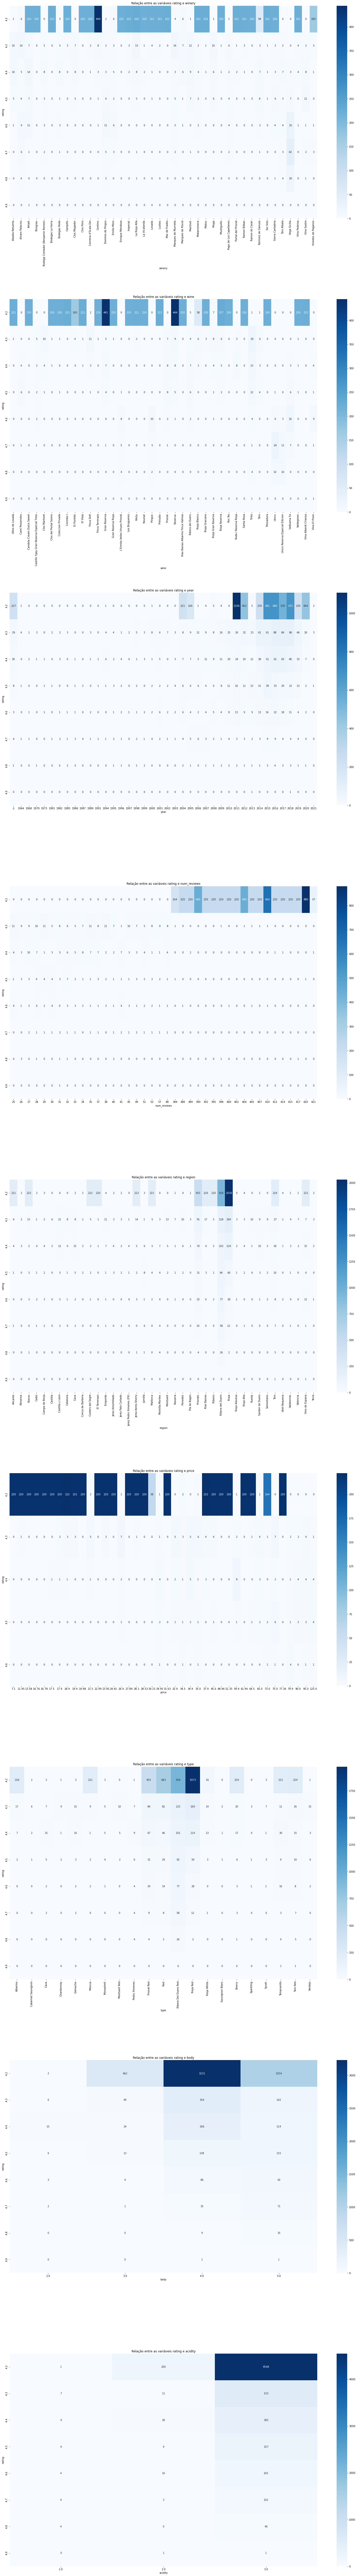

In [31]:
fig, axes = plt.subplots(9, 1, figsize = (30, 150))
plt.tight_layout(pad=30)
for i, variavel in enumerate(df_dict.query('variavel != "rating"').variavel.to_list()):
    lista = df[variavel].value_counts().head(40).index
    df_copy = df[df[variavel].isin(lista)]
    table = pd.crosstab(df_copy['rating'], df_copy[variavel])
    ax = sns.heatmap(data = table, 
                     annot=True, 
                     cmap='Blues', 
                     fmt='d',
                     ax=axes.flatten()[i]
                    )
    ax.set(frame_on=False)
    ax.set_title(f"Relação entre as variáveis rating e {variavel}")

plt.show()

---
- Como a grande maioria das avaliações são 4.2, fica difícil estabelecer uma relação clara entre essa avaliação e as outras variáveis.
---

#### Informações sobre o vinho mais bem avaliado

In [32]:
df_copy = df.query("wine == 'Unico' or wine=='Unico Reserva Especial Edicions'")
df_unico = df.query("wine == 'Unico'")
df_especial = df.query("wine=='Unico Reserva Especial Edicion'")

In [33]:
df_unico.head(10)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0
13,Vega Sicilia,Unico,1970,4.8,417,Ribera del Duero,925.00,Ribera Del Duero Red,5.0,3.0
16,Vega Sicilia,Unico,1962,4.8,295,Ribera del Duero,1620.00,Ribera Del Duero Red,5.0,3.0
25,Vega Sicilia,Unico,1979,4.8,118,Ribera del Duero,815.00,Ribera Del Duero Red,5.0,3.0


In [34]:
media = (df_unico['price'].sum())/len(df_unico['price'])
max = df_unico['price'].max()
min = df_unico['price'].min()
print(f'min = {min:.2f}')
print(f'max = {max:.2f}')
print(f'média = {media:.2f}')

min = 289.00
max = 2884.04
média = 824.80


In [35]:
df_especial.head(10)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
10,Vega Sicilia,Unico Reserva Especial Edicion,2016,4.8,591,Ribera del Duero,514.85,Ribera Del Duero Red,5.0,3.0
12,Vega Sicilia,Unico Reserva Especial Edicion,2018,4.8,438,Ribera del Duero,430.00,Ribera Del Duero Red,5.0,3.0
17,Vega Sicilia,Unico Reserva Especial Edicion,2019,4.8,250,Ribera del Duero,431.36,Ribera Del Duero Red,5.0,3.0
19,Vega Sicilia,Unico Reserva Especial Edicion,2004,4.8,211,Ribera del Duero,824.43,Ribera Del Duero Red,5.0,3.0
21,Vega Sicilia,Unico Reserva Especial Edicion,2013,4.8,172,Ribera del Duero,570.51,Ribera Del Duero Red,5.0,3.0
24,Vega Sicilia,Unico Reserva Especial Edicion,2010,4.8,125,Ribera del Duero,719.34,Ribera Del Duero Red,5.0,3.0
28,Vega Sicilia,Unico Reserva Especial Edicion,2005,4.8,87,Ribera del Duero,813.96,Ribera Del Duero Red,5.0,3.0
29,Vega Sicilia,Unico Reserva Especial Edicion,2020,4.8,84,Ribera del Duero,435.75,Ribera Del Duero Red,5.0,3.0
31,Vega Sicilia,Unico Reserva Especial Edicion,1985,4.8,70,Ribera del Duero,1182.77,Ribera Del Duero Red,5.0,3.0


#### Informações sobre seu preço

In [36]:
media = (df_especial['price'].sum())/len(df_especial['price'])
max = df_especial['price'].max()
min = df_especial['price'].min()
print(f'min = {min:.2f}')
print(f'max = {max:.2f}')
print(f'média = {media:.2f}')

min = 290.00
max = 1500.00
média = 728.95


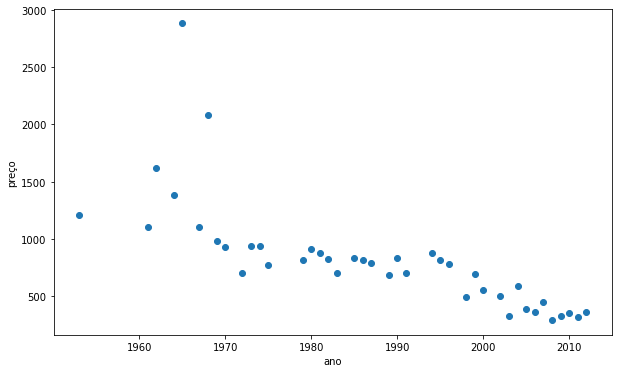

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df_copy['year'].to_list(), df_copy['price'].to_list())
plt.xlabel("ano")
plt.ylabel("preço")
plt.show()

----
- Percebe-se que o preço cai, conforme mais novo é o vinho.
----

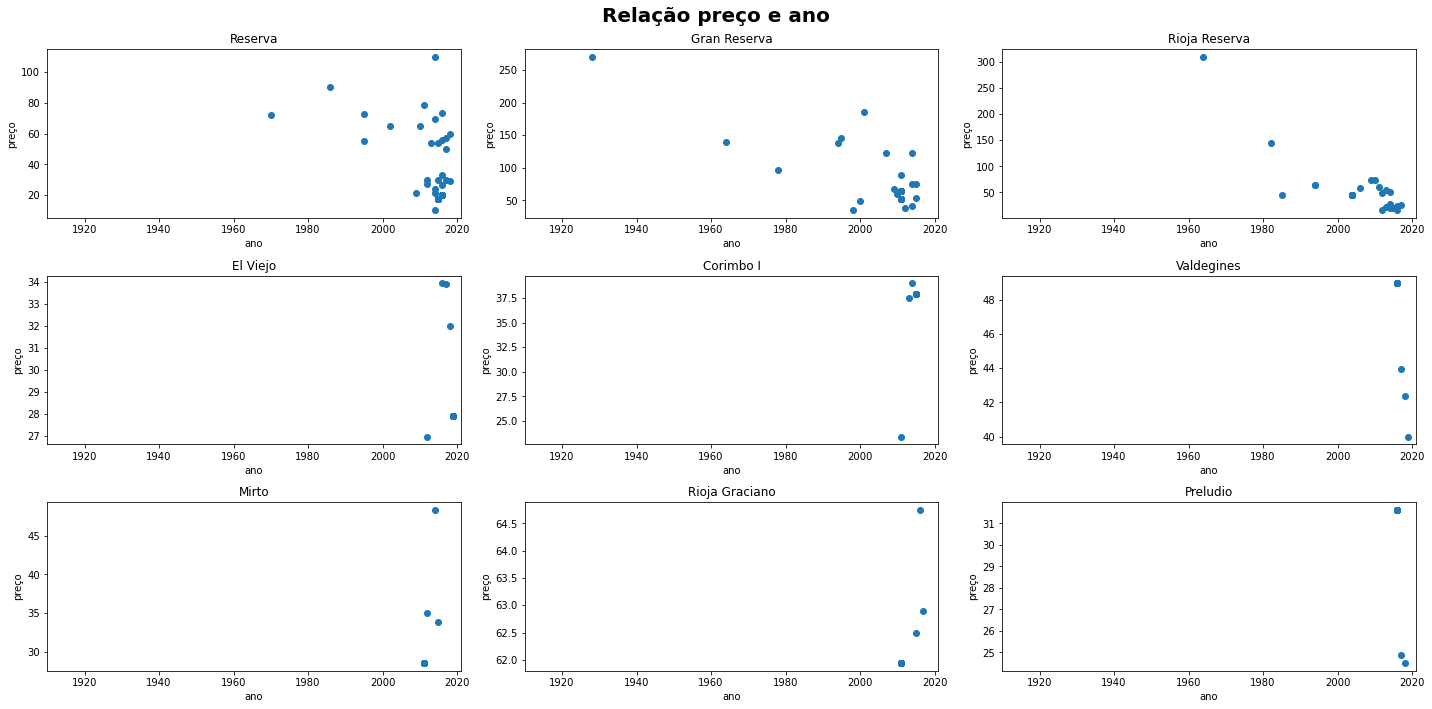

In [38]:
wines = df['wine'].value_counts().head(9).index.to_list()
fig, ax = plt.subplots(3, 3, figsize=(20,10))
fig.suptitle('Relação preço e ano', fontweight='bold', fontsize=20)
ax = ax.flatten()
dff = df.query('year!= -1')
for i, wine in enumerate(wines):
    df_copy = df.query(f"wine == @wine")
    df_copy=df_copy.query('year!=-1')
    ax[i].scatter(df_copy['year'].to_list(), df_copy['price'].to_list())
    ax[i].set_title(f'{wine}')
    ax[i].set_xlim(dff['year'].min(), df['year'].max())
    ax[i].set_xlabel('ano')
    ax[i].set_ylabel('preço')
plt.tight_layout()
plt.show()

## 3. Insights

De acordo com os dados levantados e gráficos, as informações mais importantes que podem ser percebidas são:
- Existe uma grande variedade de vinhos e vinícolas na pesquisa.
- Cada vinícola produz, majoritariamente, apenas 1 ou 2 vinhos.
- Os anos dos vinhos são bem variados.
- As avaliações são, em sua maioria absoluta, 4.2.
- O número de reviews é bem variado.
- A acidez em sua maioria é 3, porém pode-se perceber claramente quais são os vinhos de acidez 2. Eles são Valdegines, da vinícola Artadi, da Região Vino de Espana, do tipo Tempranillo, do ano 2016 e custam aproximadamente 49€.
- Os preços de cada vinho são bastante variados.
- A maioria das regiões possuem apenas uma vinícola.
- Os tipo Albarino, Mencia, Rioja White, Sherry, Tempranillo e Toro Red possuem apenas um vinho.
- Já os tipos Priorat Red, Red, Ribera del Duero Red e Rioja Red possuem uma variação de vinhos.
- Cada vinho apresenta um 'body' bem claro, sem muita dispersões nesse tipo de avaliação.
- Os vinhos com melhores avaliações são Unico, da vinícola Vega Sicilia, da região Ribera del Duero e do tipo Ribera del Duero Red.